<a href="https://colab.research.google.com/github/Altemir1/Data_analysis/blob/main/Anglicisms_in_russian_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data extraction

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=bedd06ca771517a3fc418bb30df3365f6e4fc268346c16d3f2429a6018c5c914
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Downloading all words from google ngram from 1970 - 2005

In [ ]:
import wget
import pandas as pd
import os

def download_ngrams(url, output_path):
    print(f"Downloading from {url}...")
    wget.download(url, out=output_path)
    print(f"\nDownloaded to {output_path}")

def process_ngram_file(file_path, years):
    print(f"Processing {file_path}...")
    cols = ['ngram', 'year', 'match_count', 'page_count', 'volume_count']
    top_entries = []

    # Read and filter data in chunks
    for chunk in pd.read_csv(file_path, sep='\t', header=None, names=cols, compression='gzip', chunksize=1000000):
        filtered_chunk = chunk[chunk['year'].isin(years)]
        top_per_year = (filtered_chunk.groupby('year')
                                       .apply(lambda x: x.nlargest(1000, 'match_count'))
                                       .reset_index(drop=True))
        top_entries.append(top_per_year)

    if top_entries:
        return pd.concat(top_entries)
    else:
        return pd.DataFrame(columns=cols)

def save_filtered_data(filtered_data, save_path):
    filtered_data.to_csv(save_path, index=False)
    print(f"Data filtered and saved to {save_path}")

tags = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'other', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Directory to save downloaded files in Colab
download_dir = '/content/google_1gram_dataset'
os.makedirs(download_dir, exist_ok=True)  # Ensure the directory exists

# Define years to filter on
years = list(range(1970, 2022, 5))  # From 1970 to 2020, every 5 years

for tag in tags:
    filename = f"{tag}.gz"
    new_filename = f"{tag}_1gram.csv"
    file_path = os.path.join(download_dir, filename)
    output_csv = os.path.join(download_dir, new_filename)

    url = f"http://storage.googleapis.com/books/ngrams/books/googlebooks-rus-all-1gram-20120701-{tag}.gz"

    # Downloading the file
    download_ngrams(url, file_path)

    # Processing the file
    filtered_data = process_ngram_file(file_path, years)

    # Saving the filtered data
    save_filtered_data(filtered_data, output_csv)

    # Optionally remove the original file to save space
    os.remove(file_path)



Downloaded to /content/google_1gram_dataset/a.gz
Processing /content/google_1gram_dataset/a.gz...
Data filtered and saved to /content/google_1gram_dataset/a_1gram.csv

Downloaded to /content/google_1gram_dataset/b.gz
Processing /content/google_1gram_dataset/b.gz...
Data filtered and saved to /content/google_1gram_dataset/b_1gram.csv

Downloaded to /content/google_1gram_dataset/c.gz
Processing /content/google_1gram_dataset/c.gz...
Data filtered and saved to /content/google_1gram_dataset/c_1gram.csv

Downloaded to /content/google_1gram_dataset/d.gz
Processing /content/google_1gram_dataset/d.gz...
Data filtered and saved to /content/google_1gram_dataset/d_1gram.csv

Downloaded to /content/google_1gram_dataset/e.gz
Processing /content/google_1gram_dataset/e.gz...
Data filtered and saved to /content/google_1gram_dataset/e_1gram.csv

Downloaded to /content/google_1gram_dataset/f.gz
Processing /content/google_1gram_dataset/f.gz...
Data filtered and saved to /content/google_1gram_dataset/f_1g

Merging all df into one huge dataframe

In [ ]:
import os
import pandas as pd

directory_path = "/content/google_1gram_dataset"
df_list = []

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):  # Check if it's a CSV file
        df = pd.read_csv(file_path)
        df_list.append(df)


combined_df = pd.concat(df_list, ignore_index=True)

combined_df.shape



(5692629, 5)

In [ ]:
combined_df.to_csv('russian_words_1970-2010.csv', index=False)

Creating list of anglicisms

In [ ]:
import requests
from bs4 import BeautifulSoup

# Base URL of the dictionary website
base_url = "http://anglicismdictionary.ru/"

# List of paths corresponding to each letter of the alphabet as seen in the table
paths = ['A', 'B', 'V', 'G', 'D', 'E', 'Zh', 'Z', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'F', 'Kh', 'Tc', 'Ch', 'Sh', 'Eu', 'Iu', 'Ia']

# Dictionary to store the scraped words for each letter
scraped_words = {}

# Loop through each letter's path and scrape the words
for path in paths:
    # Fetch the content of the page for the current letter
    response = requests.get(f"{base_url}{path}")
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find all strong tags - that's where the words are
        words = [tag.text for tag in soup.find_all('strong')]
        # Store the words in the dictionary under the current letter
        scraped_words[path] = words
        print(words)
    else:
        print(f"Failed to retrieve data for {path}")




['8 913 904 87 11', 'A', ' ХОЙ ', 'А/В-РЕСИВЕР', 'ААА ', 'AAA', 'AAA-ИГРА', 'АБАНДОН ', 'АБАНДОНАЦИЯ', 'АБАКОТ', 'АБГОРРЕРЫ', 'АБДОМИНОПЛАСТИКА ', 'АБЕКОР', ' ', 'АБЕЛИТ ', 'Абелитовый', 'АБЕРДИН-АНГУС', 'АБЕРРАЦИЯ ', 'Аберрационный', 'АБЕЦЕДАРИЙ', 'АБЗОРПШЕН-КОСТИНГ', 'АБИЛИТАЦИЯ', 'Абилитационный', 'АБИЛИТИ', 'Абилка', 'АБИССИНИЯ', 'Абиссинийский', 'АБЛЕИЗМ', 'АБЛЯЦИЯ', 'Абляционный', 'АБОЛИЦИОНИЗМ ', 'АБОЛИЦИОНИСТ ', 'Аболиционистский', 'АБОЛИЦИОНИСТСКАЯ ЛИТЕРАТУРА', 'АБОРТ ', 'АБРАЗИВ', 'Абразивный', 'АБРУПЦИЯ', 'АБСЕНТЕИЗМ, АБСЕНТИЗМ ', '\xa0Абсентеист', ' Абсентеистский', 'АБСОРБ ', 'АБСОРБЕР ', 'Абсорберный', 'Абсорбировать', 'Абсорбирующий', 'АБСОРБЦИОМЕТР', 'АБСОРБЦИОМЕТРИЧЕСКИЙ АНАЛИЗАТОР', 'АБСОРБЦИОМЕТРИЯ', 'АБСТЕНЦИЯ', 'АБСТИНЕНТ', 'АБСТИНЕНЦИЯ', 'АБСТРАКТ', 'АБСТРАКТ', 'АБСТРАКТНЫЙ ХИП-ХОП', 'АБСУРДИСТАН ', 'АБУЗ', 'Абузить', 'АБЬЮЗ ', ' Абьюзивный', 'АБЬЮЗЕР', 'Абьюзерский', 'АБЭ', 'АВАКС', 'АВАЛАНЧ ШОТ', 'АВАЛЬ', 'Авальный', 'АВАНГАРДНЫЙ ГРАЙНД', 'АВАНГАРДНЫЙ ДЖАЗ', 'АВ

In [ ]:
anglicisms = []

for key, values in scraped_words.items():
 anglicisms = anglicisms + values



process anglicism list

In [ ]:
import string
# Deleting
elements_to_remove = ["8 913 904 87 11", " ", "\xa0" ]

for element in elements_to_remove:
  anglicisms.remove(element)


# Clean the list
clean_anglicisms = []
for word in anglicisms:
    # Convert to lowercase
    word = word.lower()
    # Remove non-breaking space
    word = word.replace('\xa0', '')
    # Remove spaces and punctuation
    word = word.strip().strip(string.punctuation)
    clean_anglicisms.append(word)

# The list is now formatted
len(clean_anglicisms)



29671

In [ ]:
def has_duplicates(input_list):
    if len(input_list) != len(set(input_list)):
        return True  # There are duplicates
    return False  # No duplicat

has_duplicates(clean_anglicisms)

True

In [ ]:
clean_anglicisms = list(set(clean_anglicisms))
len(clean_anglicisms)

26683

#Data preprocessing

In [ ]:
import pandas as pd

combined_df = pd.read_csv("russian_words_1970-2010.csv")

combined_df

,ngram,year,match_count,page_count,volume_count
0,что_NOUN,1970,875039,9051,NaN
1,числа_NOUN,1970,176999,7757,NaN
2,цели,1970,95767,7575,NaN
3,частей_NOUN,1970,85310,7353,NaN
4,чувство,1970,53905,4867,NaN
...,...,...,...,...,...
5692624,XXв_NOUN,2005,40,26,NaN
5692625,Xилкова,2005,40,24,NaN
5692626,Xутор,2005,40,26,NaN
5692627,XXXII_X,2005,40,24,NaN


Drop unnecessary columns

In [ ]:
combined_df.drop(columns=["page_count", "volume_count"], inplace=True)

combined_df

,ngram,year,match_count
0,что_NOUN,1970,875039
1,числа_NOUN,1970,176999
2,цели,1970,95767
3,частей_NOUN,1970,85310
4,чувство,1970,53905
...,...,...,...
5692624,XXв_NOUN,2005,40
5692625,Xилкова,2005,40
5692626,Xутор,2005,40
5692627,XXXII_X,2005,40


Formatitting

In [ ]:
combined_df['ngram'] = combined_df['ngram'].str.lower().str.strip()

# Remove any text after an underscore and strip again to ensure no leading/trailing spaces are left
combined_df['ngram'] = combined_df['ngram'].str.split('_').str[0].str.strip()

combined_df

,ngram,year,match_count
0,что,1970,875039
1,числа,1970,176999
2,цели,1970,95767
3,частей,1970,85310
4,чувство,1970,53905
...,...,...,...
5692624,xxв,2005,40
5692625,xилкова,2005,40
5692626,xутор,2005,40
5692627,xxxii,2005,40


In [ ]:
# Remove all punctuations from the 'word' column
combined_df['ngram'] = combined_df['ngram'].str.replace(r'[^\w\s]', '', regex=True)


Creating table for each year

In [ ]:
tables_by_year = {}

for year, group in combined_df.groupby('year'):
    sorted_group = group.sort_values(by='match_count', ascending=False)
    sorted_group = sorted_group.drop_duplicates(subset=['ngram'])
    top_10000 = sorted_group.head(10000)
    tables_by_year[year] = top_10000



Checking tables in dictionary

In [ ]:
tables_by_year[1970]

,ngram,year,match_count
5540629,и,1970,32547635
699176,в,1970,28117719
475176,на,1970,12088372
3351588,с,1970,10226351
547176,не,1970,8165874
...,...,...,...
395202,недовольство,1970,9232
4079612,крест,1970,9231
1507207,правового,1970,9229
4999619,длительный,1970,9229


Mark anglicisms in the datasets

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fe9c62d3079aad5a06d9e046f85361d03466504f3df569bb146f84de987807eb
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


Apply lemmatization methods

In [ ]:
import pandas as pd
import pymorphy2

# Initialize the pymorphy2 analyzer
morph = pymorphy2.MorphAnalyzer()
anglicisms_lemmatized = {morph.parse(word)[0].normal_form for word in clean_anglicisms}

def mark_anglicisms(df, anglicism_set):
    # Apply lemmatization to the 'ngram' column and check if it's an anglicism
    df['anglicism'] = df['ngram'].apply(lambda x: morph.parse(x)[0].normal_form in anglicism_set)
    return df


# Apply the function to each dataset
for name, df in tables_by_year.items():
    tables_by_year[name] = mark_anglicisms(df, anglicisms_lemmatized)


<ipython-input-26-dd4e10f6db80>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anglicism'] = df['ngram'].apply(lambda x: morph.parse(x)[0].normal_form in anglicism_set)


#Data visualization

1. Соотношение Англицизмов

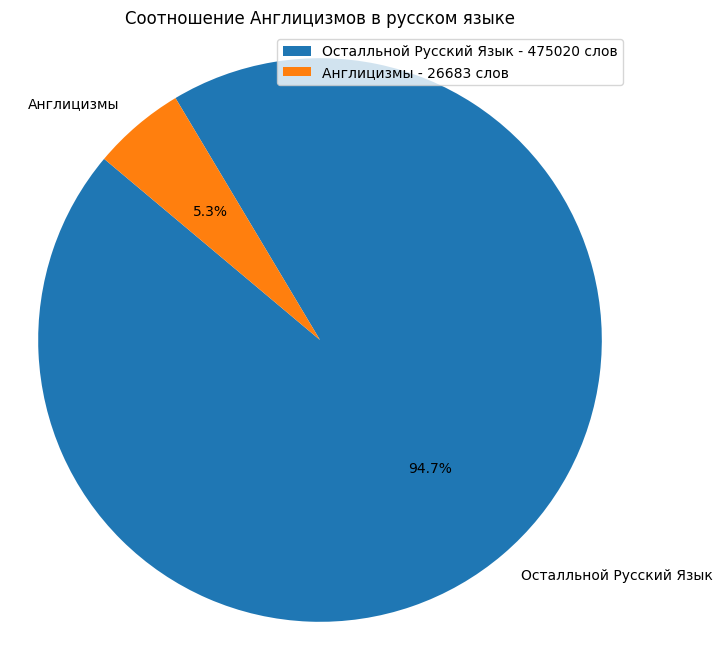

In [ ]:
russian_words = combined_df.nunique().iloc[0]
anglicisms = len(clean_anglicisms)

import matplotlib.pyplot as plt

# Sample data: Categories and their corresponding values
categories = ["Осталльной Русский Язык","Англицизмы"]
values = [russian_words, anglicisms]

# Create pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

# Title for the pie chart
plt.title('Соотношение Англицизмов в русском языке')

# Make the labels of the pie chart
labels = ['{0} - {1} слов'.format(i,j) for i,j in zip(categories, values)]

# Adding a legend
plt.legend(patches, labels, loc='upper right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

2.Изменение соотношений англицизмов со временем

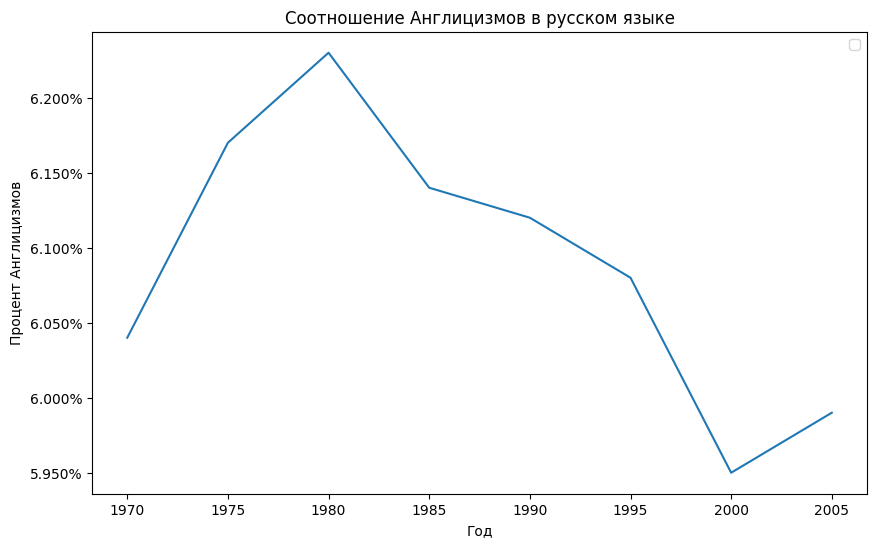

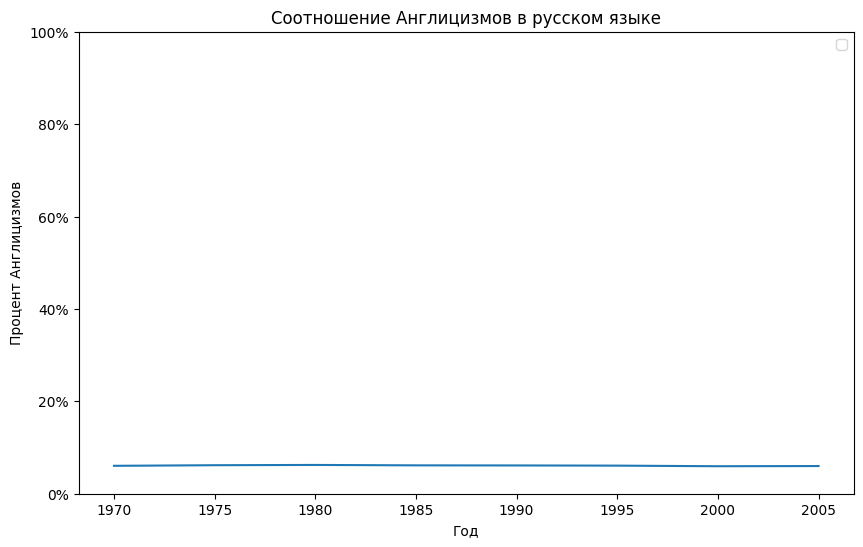

In [ ]:
from matplotlib.ticker import PercentFormatter
years = list(range(1970, 2010, 5))

ratio_anglicisms = []

for year, df in tables_by_year.items():
  ratio_anglicisms.append((len(df[df["anglicism"] == True])/10000))

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
plt.plot(years, ratio_anglicisms)
# Adding labels and title
plt.xlabel('Год')
plt.ylabel('Процент Англицизмов')
plt.title('Соотношение Англицизмов в русском языке из топ 10000 слов')
plt.xticks(years)  # Set the x-ticks to be the years
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(years, ratio_anglicisms)
# Adding labels and title
plt.xlabel('Год')
plt.ylabel('Процент Англицизмов')
plt.title('Соотношение Англицизмов в русском языке из топ 10000 слов')
plt.xticks(years)  # Set the x-ticks to be the years
plt.legend()
plt.ylim([0, 1])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Show the plot
plt.show()



3.Слова которые уже не используются в 10000 самых используемых слов

In [ ]:
# Assuming 'dataframes_dict' is your dictionary of DataFrames keyed by year
years = sorted(tables_by_year.keys())

anglicisms_got_out = {}
anglicisms_got_in = {}

for i in range(len(years) - 1):
    current_anglicisms = set(tables_by_year[years[i]][tables_by_year[years[i]]['anglicism']]['ngram'])
    next_anglicisms = set(tables_by_year[years[i + 1]][tables_by_year[years[i + 1]]['anglicism']]['ngram'])

    anglicisms_out = current_anglicisms.difference(next_anglicisms)
    anglicisms_in = next_anglicisms.difference(current_anglicisms)

    anglicisms_got_out[f"Year {years[i]} to {years[i+1]}"] = anglicisms_out
    anglicisms_got_in[f"Year {years[i]} to {years[i+1]}"] = anglicisms_in

    print(f"Year {years[i]} to {years[i+1]}: {len(anglicisms_out)} anglicisms got out of top 10,000")
    print(f"Year {years[i]} to {years[i+1]}: {len(anglicisms_in)} new anglicisms entered the top 10,000")


Year 1970 to 1975: 34 anglicisms got out of top 10,000
Year 1970 to 1975: 47 new anglicisms entered the top 10,000
Year 1975 to 1980: 31 anglicisms got out of top 10,000
Year 1975 to 1980: 37 new anglicisms entered the top 10,000
Year 1980 to 1985: 37 anglicisms got out of top 10,000
Year 1980 to 1985: 28 new anglicisms entered the top 10,000
Year 1985 to 1990: 52 anglicisms got out of top 10,000
Year 1985 to 1990: 50 new anglicisms entered the top 10,000
Year 1990 to 1995: 59 anglicisms got out of top 10,000
Year 1990 to 1995: 55 new anglicisms entered the top 10,000
Year 1995 to 2000: 57 anglicisms got out of top 10,000
Year 1995 to 2000: 44 new anglicisms entered the top 10,000
Year 2000 to 2005: 30 anglicisms got out of top 10,000
Year 2000 to 2005: 34 new anglicisms entered the top 10,000


In [ ]:
print("Got In")
for key, value in anglicisms_got_in.items():
  print(f'{key}:')
  print(value)
  print("_______"*10)
  print()

print("Got Out")
for key, value in anglicisms_got_out.items():
  print(f'{key}:')
  print(value)
  print("_______"*10)
  print()


Got In
Year 1970 to 1975:
{'адаптации', 'пи', 'эффектом', 'пк', 'док', 'лазера', 'мод', 'каналы', 'аппроксимации', 'индекса', 'пачки', 'стандартов', 'центрами', 'моделях', 'моделью', 'егор', 'депрессии', 'сфер', 'мат', 'импорта', 'стандартизации', 'фильмов', 'пика', 'рой', 'сфера', 'алгоритмов', 'трактора', 'режимы', 'стандартных', 'сферах', 'индексов', 'интенсивное', 'регрессии', 'кредитов', 'конф', 'мак', 'транс', 'свита', 'флуктуации', 'девона', 'экономикой', 'системам', 'грина', 'пресс', 'реагентов', 'макс', 'лазерного'}
______________________________________________________________________

Year 1975 to 1980:
{'стандарта', 'интерпретация', 'ван', 'электрон', 'парт', 'поет', 'федора', 'лондоне', 'папа', 'лазеров', 'спорта', 'кс', 'фильме', 'дата', 'интенсивностей', 'игр', 'спорт', 'тез', 'моды', 'бабушка', 'спин', 'арт', 'принципам', 'думы', 'тп', 'клуб', 'тер', 'лидеров', 'конфликтов', 'дам', 'реактора', 'ских', 'ром', 'танк', 'рекомбинации', 'ад', 'борту'}
_______________________

4.Топ самых используемых англицизмов в каждом году

Год: 1970


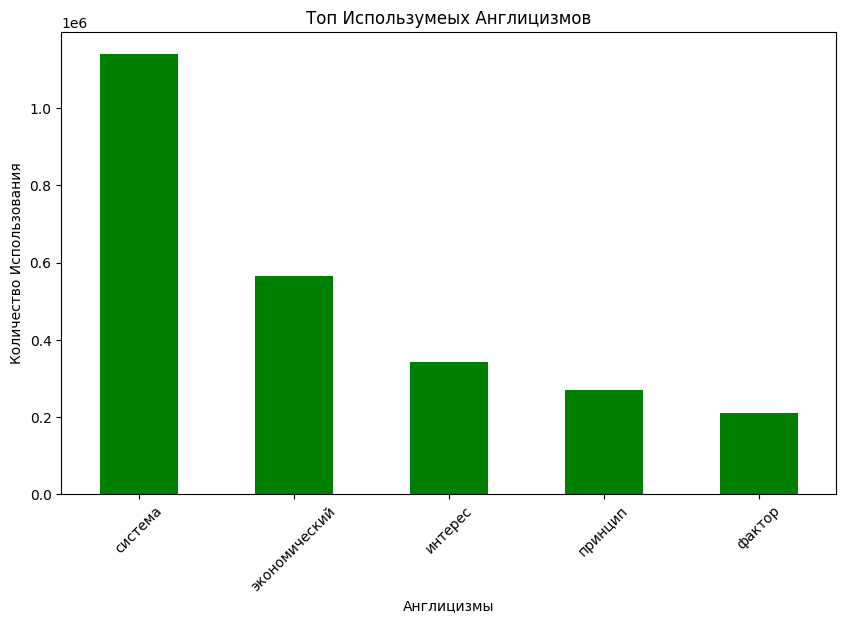

Год: 1975


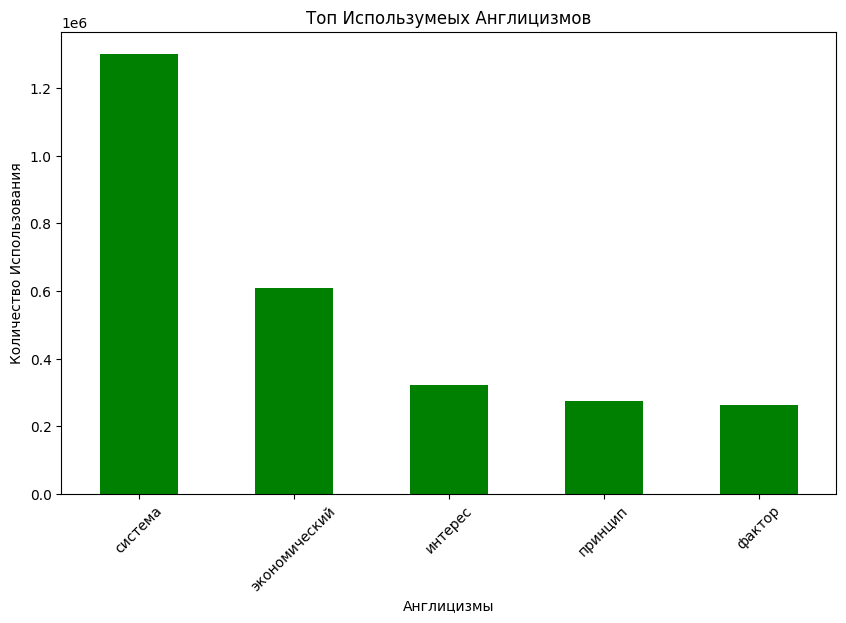

Год: 1980


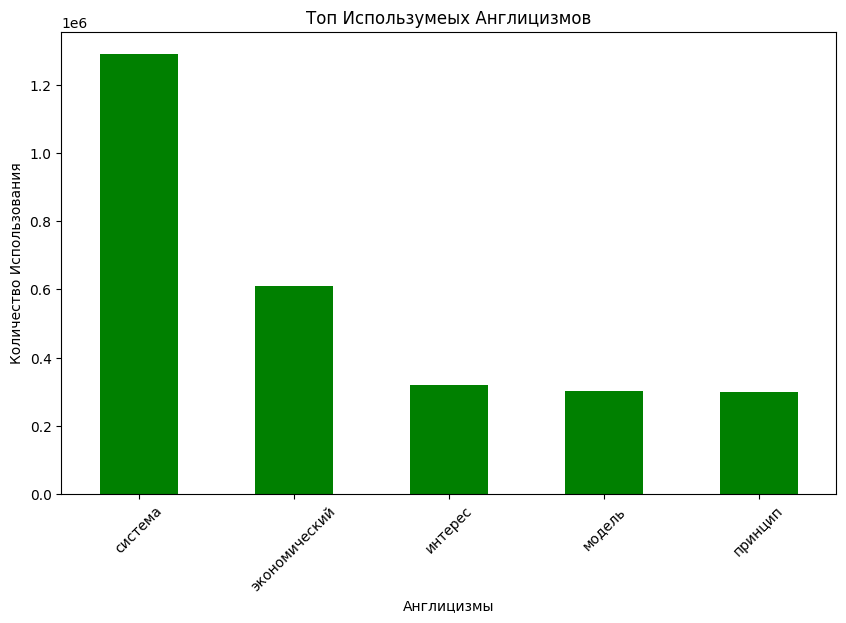

Год: 1985


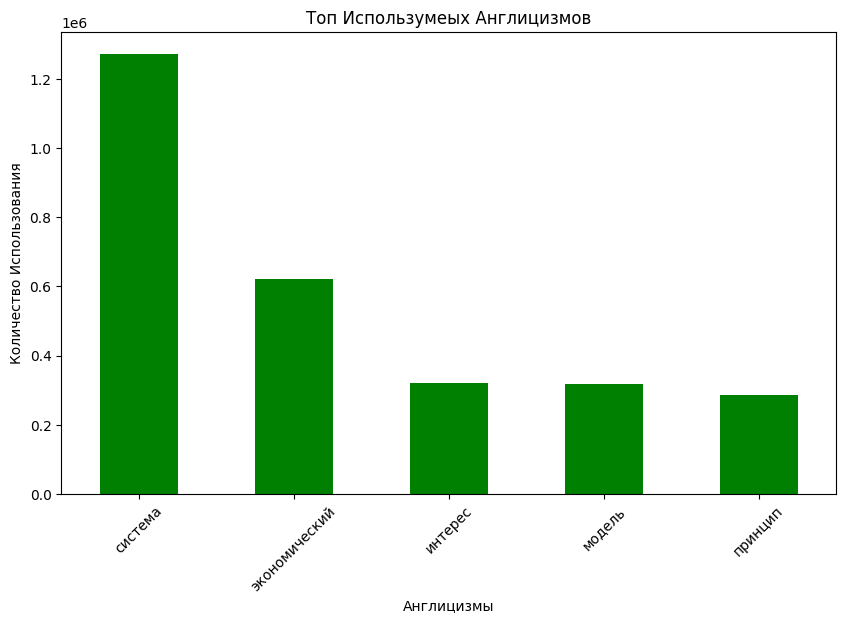

Год: 1990


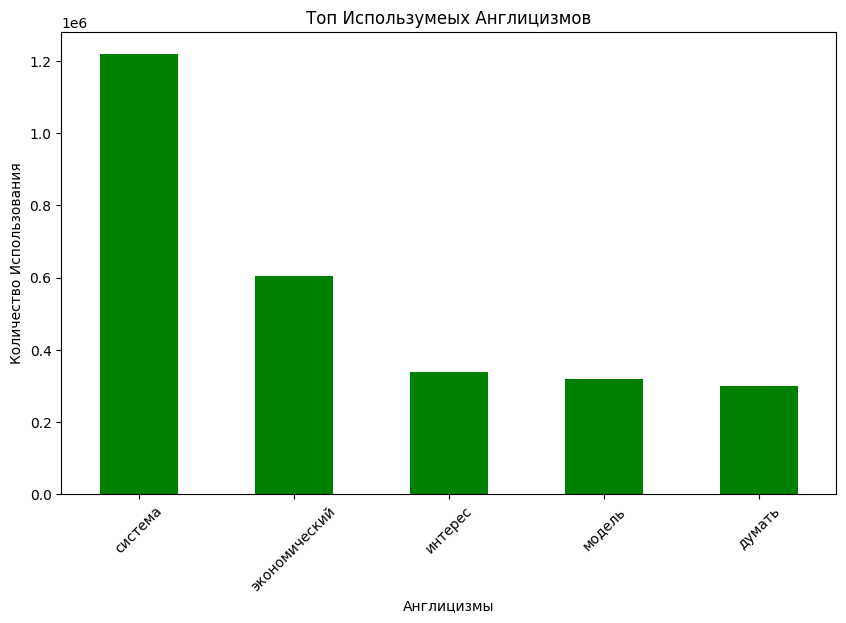

Год: 1995


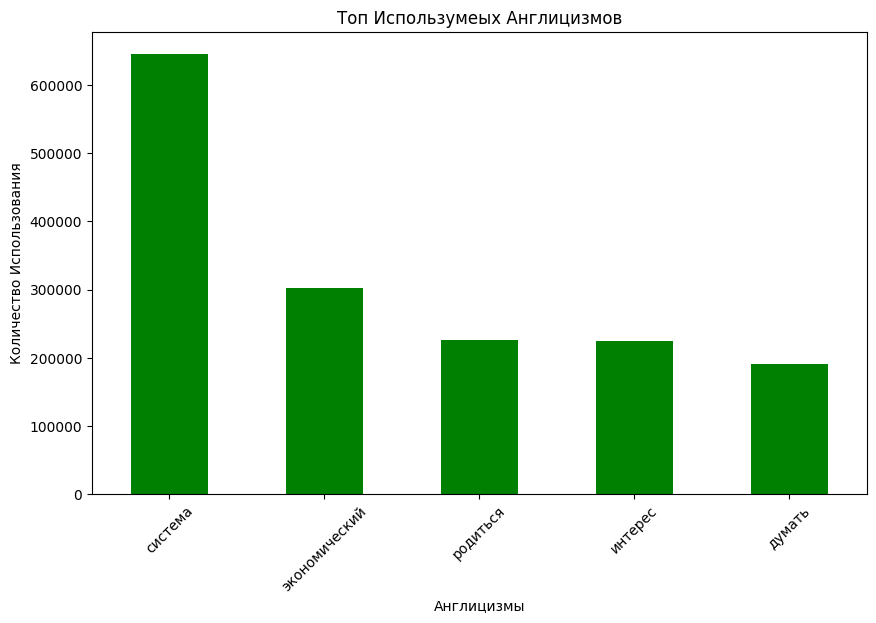

Год: 2000


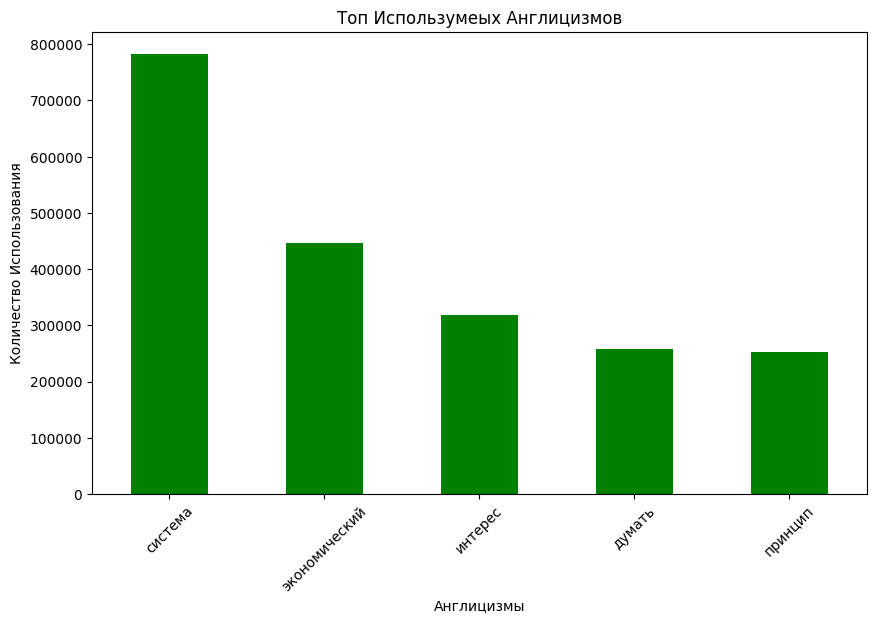

Год: 2005


<ipython-input-63-c4e1a92202c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_ngram'] = df['ngram'].apply(lambda x: morph.parse(x)[0].normal_form)


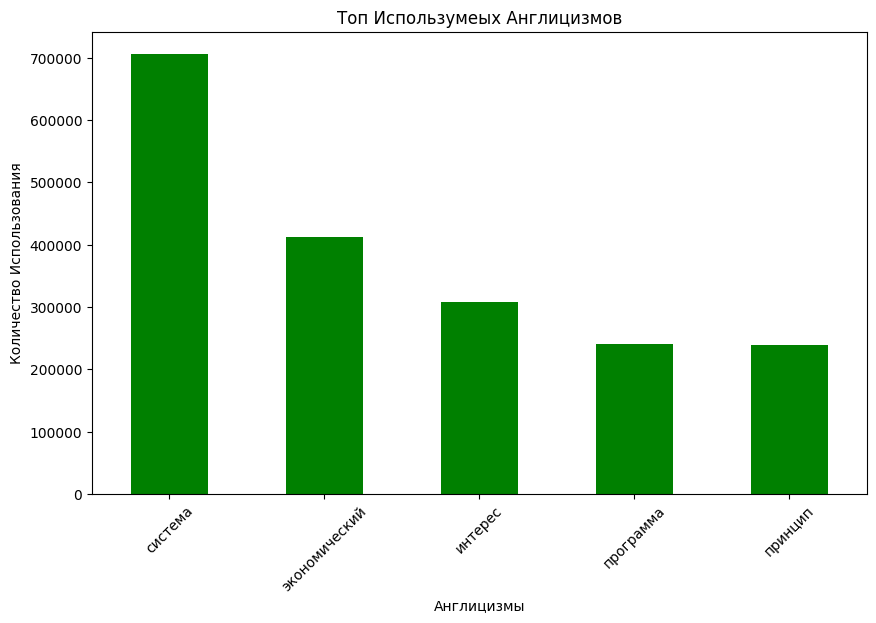

In [ ]:
def plot_lemmatized_top_anglicisms(df, top_n=5):
    # Ensure anglicism column exists and apply lemmatization
    if 'anglicism' in df.columns and 'ngram' in df.columns:
        # Lemmatize and filter
        df['lemmatized_ngram'] = df['ngram'].apply(lambda x: morph.parse(x)[0].normal_form)
        filtered = df[(df['anglicism'] == True) & (df['lemmatized_ngram'].str.len() >= 6)]

        # Get the most frequent lemmatized anglicisms
        top_anglicisms = filtered.groupby('lemmatized_ngram')['match_count'].sum().nlargest(top_n)

        # Plotting
        top_anglicisms.plot(kind='bar', figsize=(10, 6), color='green')
        plt.title('Топ Использумеых Англицизмов')
        plt.xlabel('Англицизмы')
        plt.ylabel('Количество Использования')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Required columns are missing in the DataFrame.")

for year, df in tables_by_year.items():
    print(f"Год: {year}")
    plot_lemmatized_top_anglicisms(df)

